# LinkedIn Job Analysis

## Introduction

 - The data was scrapped from linkedin using a web scraper built with selenium and it was
   stored in a csv file 
 - The scope of this analysis answers the following questions:
 
   - Which states/cities in the United States have the highest number of Data science 
     Jobs? 
   - Which software/programming languages are required for most jobs?
   - What are the key skills required for these jobs? 
   - Which python libraries are the most in demand in the current DS/ML job market? 
   
 
 - Answers to the above questions will help job-seekers build their portfolio and
   resume to better fit these positions
 - Apart from these answers, this will also help maintain all the job openings data in an
   organised manner
 - The later stage of this analysis also includes a deep dive into the positions offered by
   tech moguls (Facebook, Apple, Amazon, Netflix, Google, Tesla, Uber) 
 - Natural Language Processing (NLP) is used to analyze the job descriptions 

## Importing the necessary libraries


Please **pip install** the libraries are not installed on your system

In [1]:
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import string
%config InlineBackend.figure_format='retina'

/Users/akashbhoite/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


- The data scraped using the web-scraper was stored in a file named 'linkedin.csv'
- I did some basic cleaning of the data using excel like:
  - Missing states were updated with the help of the corresponding city
  - City names like New York City Metropolitian area was changed to New York City, Greater 
    Boston was changed to Boston, San Francisco Bay area was changed to San Francisco
    
    
- After basic cleaning and handling the missing values, the data was stored in
  **linkedinfinal.csv**

### ***Some data cleaning and preparation can be easily done using Excel. We do not need to write complex code for doing something which Excel can handle in a few clicks.***

In [2]:
df = pd.read_csv('linkedinfinal.csv')

In [3]:
df.head()

,Title,Company,City,State,Description
0,Data Scientist,The Hartford,Wethersfield,Connecticut,Data Scientist - GD08AEYou are a driven and mo...
1,Research Data Scientist,Facebook,New York City,New York,Facebook's mission is to give people the power...
2,Data Science Associate,PIMCO,New York City,New York,General InformationRef #: 28750Employee Type: ...
3,"Data Scientist (Hartford, Connecticut)",Tiger Analytics,Hartford,Connecticut,Tiger Analytics is looking for experienced Dat...
4,Data Scientists,CVS Health,Woonsocket,Rhode Island,It's a new Day in Healthcare and CVS Health ne...


In [4]:
df.isna().sum()

Title          0
Company        0
City           4
State          1
Description    0
dtype: int64

### Since there are only 4 rows with missing city and state, we can eliminate those rows. 

In [5]:
df.dropna(inplace=True)

In [6]:
df['State'] = df['State'].str.strip(' ')

Text(0.5, 1.0, 'States with most Data-Science Jobs')

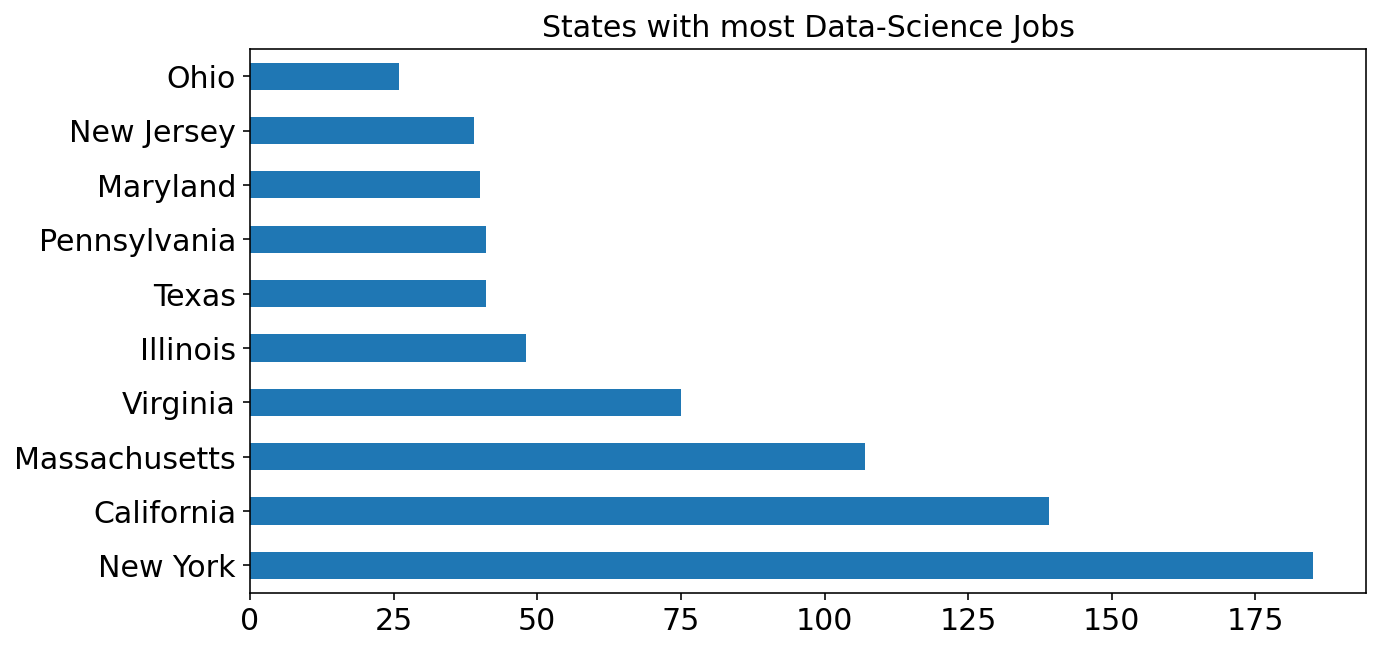

In [7]:
plt.figure(figsize=(10,5))
df['State'].value_counts().head(10).plot(kind='barh')
plt.xticks(rotation = 0,fontsize=15)
plt.yticks(rotation = 0,fontsize=15)
plt.title('States with most Data-Science Jobs', fontsize = 15)

Text(0.5, 1.0, 'Cities with most Data-Science Jobs')

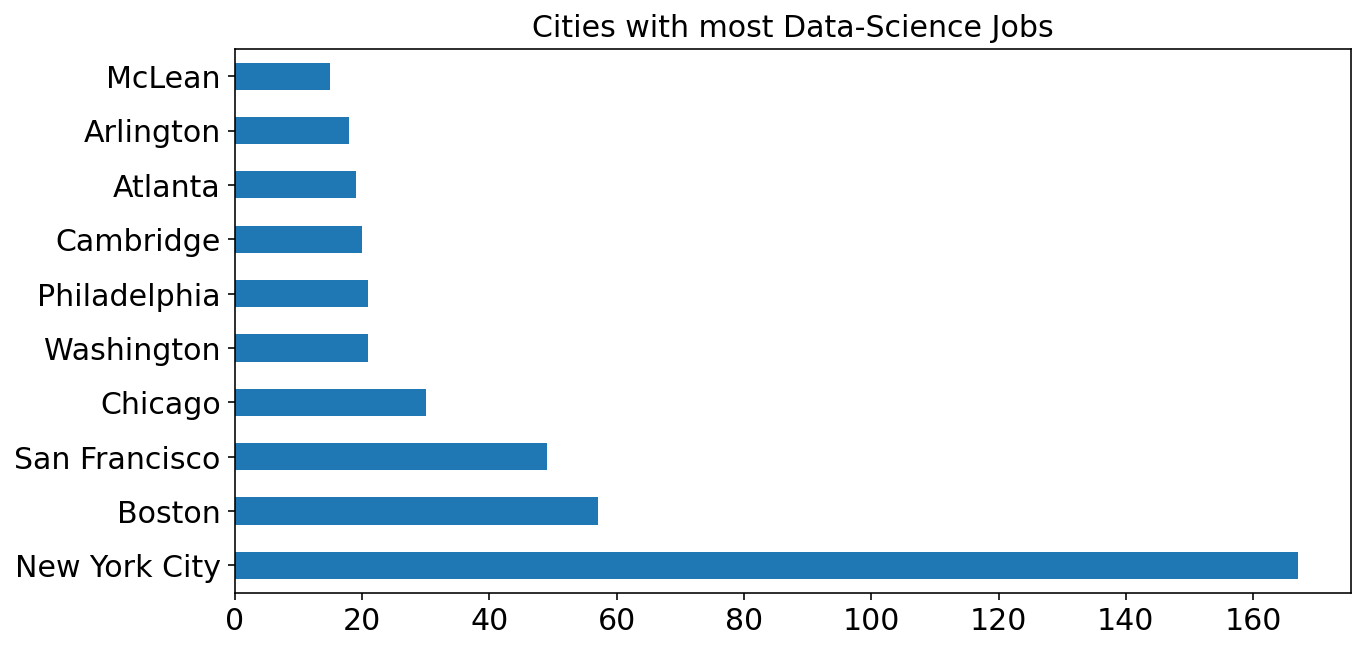

In [8]:
plt.figure(figsize=(10,5))
df['City'].value_counts().head(10).plot(kind='barh')
plt.xticks(rotation = 0,fontsize=15)
plt.yticks(rotation = 0,fontsize=15)
plt.title('Cities with most Data-Science Jobs', fontsize = 15)

## Creating a function to tokenize words 

Word tokenization is the process of splitting a large sample of text into words. This is a requirement in natural language processing tasks where each word needs to be captured and subjected to further analysis like classifying and counting them

In [9]:
def cleanTokens(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    desc = [word for word in desc if word not in stop_words]
    return desc

In [10]:
tags_df=df['Description'].apply(cleanTokens)

In [11]:
from collections import Counter
result = tags_df.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})

## Created lists to compare libraries, tools and ML platforms 
- Please note that, you can try to find different words/skills by creating a new list and executing the following code with the name of your list in: <br>
  **filter_series = result_series.filter(items='*NAME OF YOUR LIST*')**

In [12]:
libraries = ["nltk","pandas","numpy","matplotlib","sklearn"]
tools = ["tableau","excel","python","aws","sql"]
ML = ["theano", "pytorch", "tensorflow", "keras","opencv"]
big_data = ["hadoop","bigquery","spark","storm"]
IDE = ["jupyter","pycharm","spyder","idle"]

Text(0.5, 1.0, 'Popular Software/Programming lanaguges required for DS/ML Jobs')

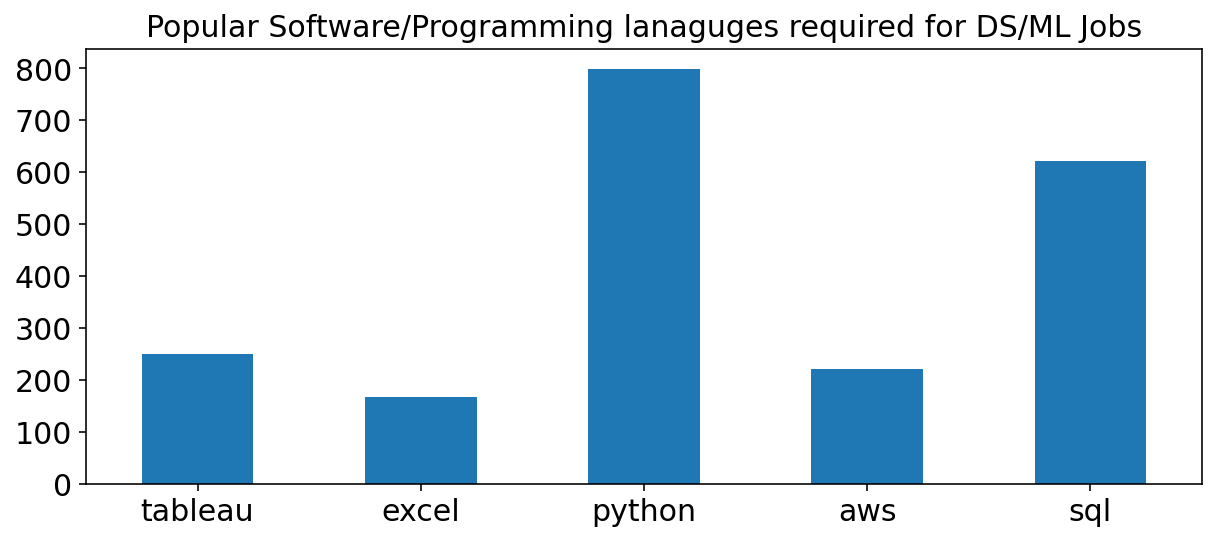

In [13]:
filter_series = result_series.filter(items=tools)
filter_series.plot(kind='bar',figsize=(10,4))
plt.xticks(rotation = 0, fontsize=15)
plt.yticks(rotation = 0, fontsize=15)
plt.title('Popular Software/Programming lanaguges required for DS/ML Jobs',fontsize=15)

Text(0.5, 1.0, 'Popular PYTHON Libraries required for DS/ML Jobs')

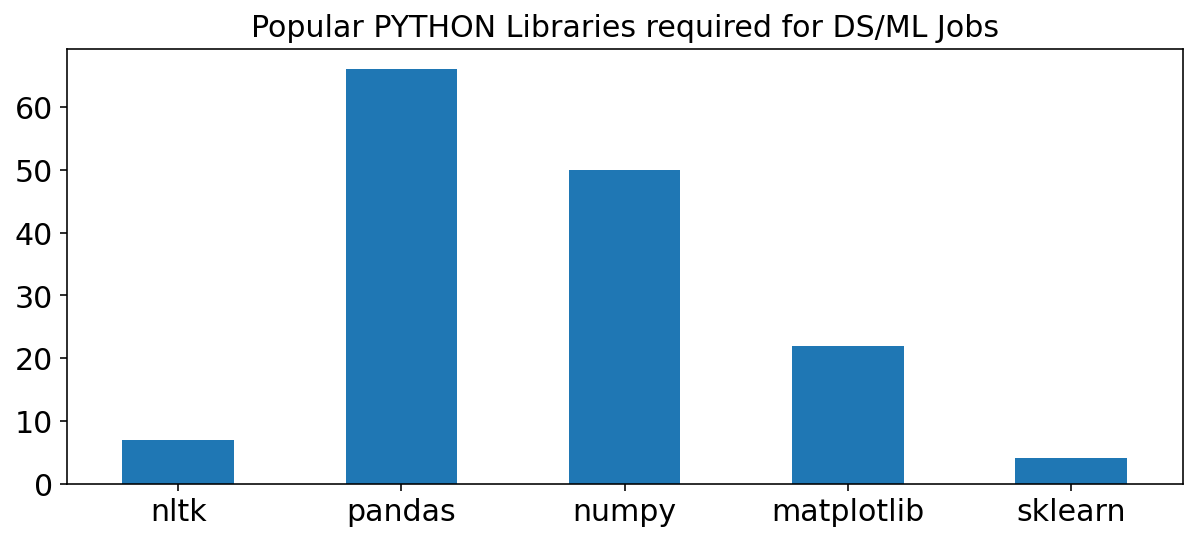

In [14]:
filter_series = result_series.filter(items=libraries)
filter_series.plot(kind='bar',figsize=(10,4))
plt.xticks(rotation = 0, fontsize=15)
plt.yticks(rotation = 0, fontsize=15)
plt.title('Popular PYTHON Libraries required for DS/ML Jobs',fontsize=15)

Text(0.5, 1.0, 'Popular Machine Learning platforms')

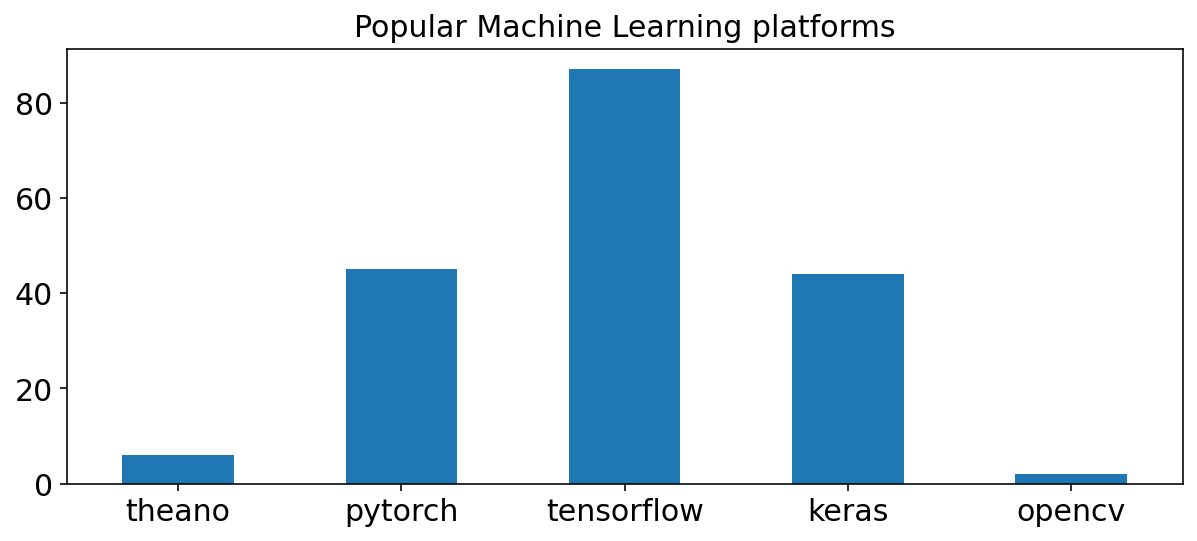

In [15]:
filter_series = result_series.filter(items=ML)
filter_series.plot(kind='bar',figsize=(10,4))
plt.xticks(rotation = 0, fontsize=15)
plt.yticks(rotation = 0, fontsize=15)
plt.title('Popular Machine Learning platforms',fontsize=15)

Text(0.5, 1.0, 'Popular Big Data Skills')

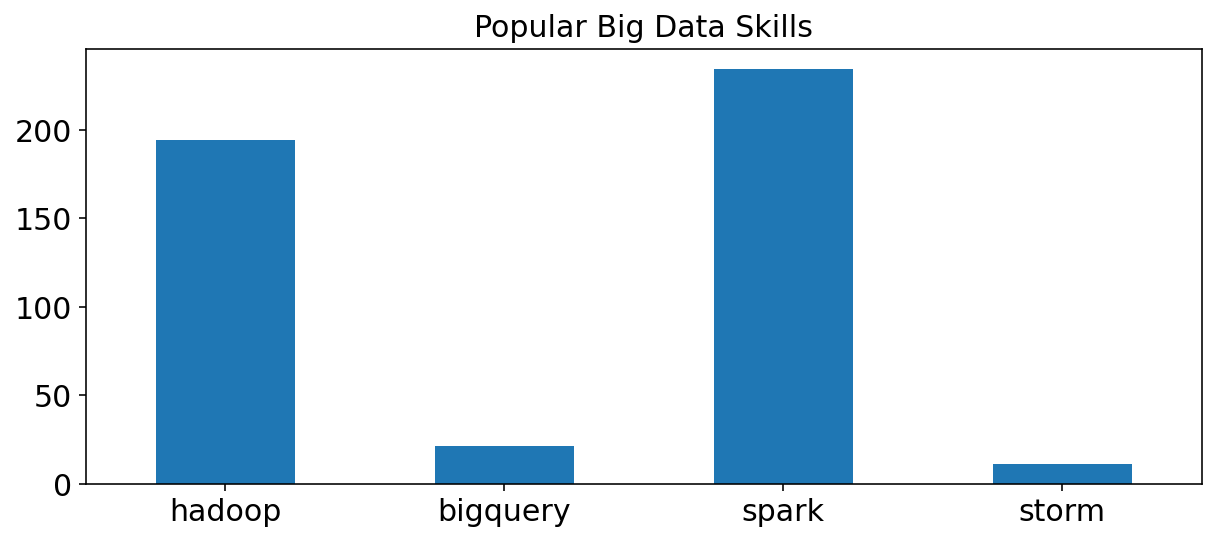

In [16]:
filter_series = result_series.filter(items=big_data)
filter_series.plot(kind='bar',figsize=(10,4))
plt.xticks(rotation = 0, fontsize=15)
plt.yticks(rotation = 0, fontsize=15)
plt.title('Popular Big Data Skills',fontsize=15)

Text(0.5, 1.0, 'Popular Python IDE/Notebooks')

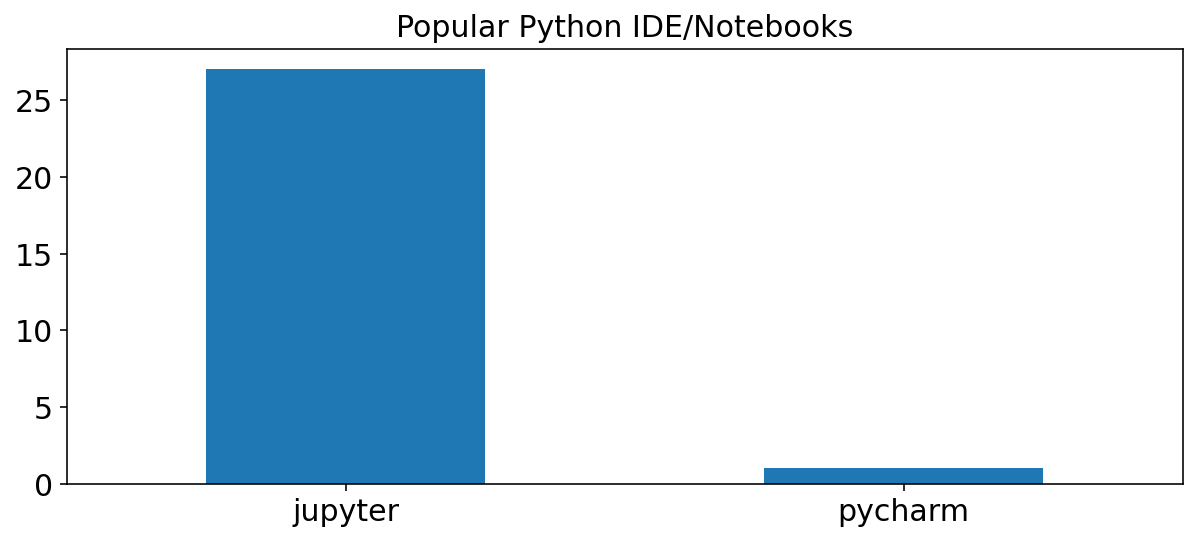

In [17]:
filter_series = result_series.filter(items=IDE)
filter_series.plot(kind='bar',figsize=(10,4))
plt.xticks(rotation = 0, fontsize=15)
plt.yticks(rotation = 0, fontsize=15)
plt.title('Popular Python IDE/Notebooks',fontsize=15)

## Creating a Dataframe with only Top Tech Compaies
  - I will refer to these companies as **FANG**. *(Facebook, Apple, Netflix, Google, etc.)*
  - You can take the companies you are interested to apply for
  

In [18]:
df_fang = df[df['Company'].isin(['Facebook','Amazon','Netflix','Google',
                                 'Twitter','Tesla','Microsoft','Apple','Uber'])].reset_index(drop = True)

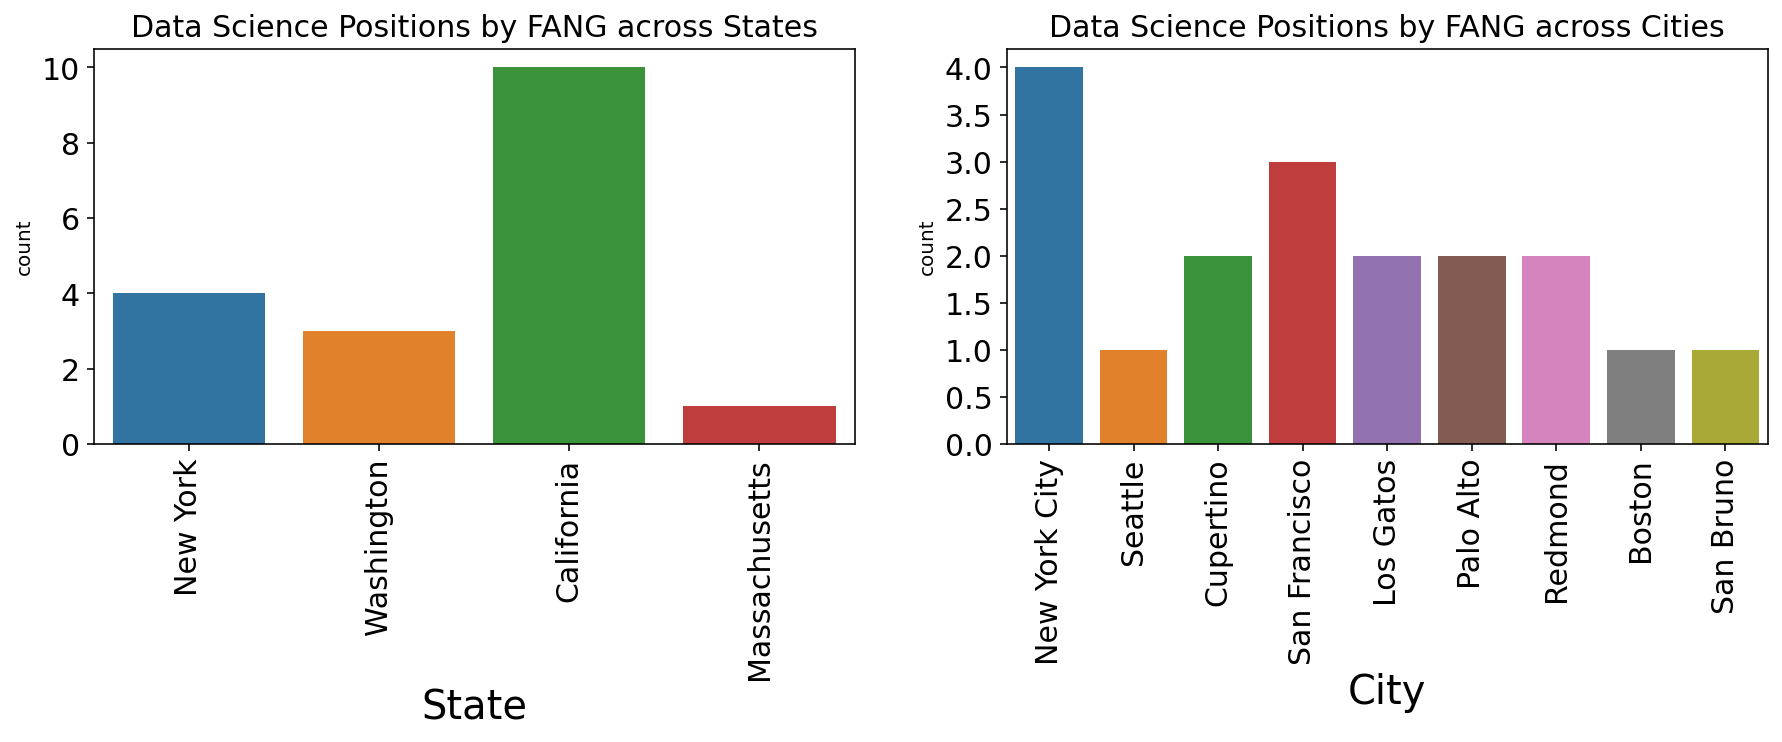

In [19]:
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.xlabel('City',fontsize=20)
plt.xticks(rotation = 90,fontsize=15)
plt.yticks(rotation = 0,fontsize=15)
plt.title('Data Science Positions by FANG across States', fontsize=15)
sns.countplot(df_fang['State'])
plt.subplot(222)
plt.xlabel('City',fontsize=20)
plt.xticks(rotation = 90,fontsize=15)
plt.yticks(rotation = 0,fontsize=15)
plt.title('Data Science Positions by FANG across Cities', fontsize=15)
sns.countplot(df_fang['City'])

## Creating a function to exract descriptions from the main dataframe

In [20]:
def get_description(Name):
    
    d = []
    df_d = df[df['Company'] == Name]
    df_d.reset_index(drop=True)
    for i in range(0,len(df_d)):
        desc = df_d['Description'].iloc[i]
        d.append(desc)
        f = ''.join(d)
        
    return f

In [21]:
Amazon = get_description('Amazon')
Apple = get_description('Apple')
Netflix = get_description('Netflix')
Microsoft = get_description('Microsoft')
Twitter = get_description('Twitter')
Google = get_description('Google')
Tesla = get_description('Tesla')

In [22]:
df_ub = df[df['Company'] == 'Uber']
df_ub.reset_index(drop=True,inplace=True)
df_fb = df[df['Company'] == 'Facebook']
df_fb.reset_index(drop=True,inplace=True)

## Facebook and Uber have the same job description posted for both their jobs. Thus, I only store one of them 

In [23]:
desc1 = df_ub['Description'][0]
tostr= ''.join(desc1)
Uber = []
Uber.append(tostr)


In [24]:
desc2 = df_fb['Description'][0]
tostr2 = ''.join(desc2)
fb = []
fb.append(tostr2)

## Creating a Dataframe for the job descriptions of FANG Companies

In [25]:
df_description= pd.DataFrame({'Amazon':Amazon,'Apple':Apple,'Netflix':Netflix,
                              'Microsoft': Microsoft,'Twitter':Twitter,
                              'Google':Google,'Tesla':Tesla,'Uber':Uber,'Facebook':fb},index=['description'])



In [26]:
df_description

,Amazon,Apple,Netflix,Microsoft,Twitter,Google,Tesla,Uber,Facebook
description,DescriptionAmazon’s Sustainability organizatio...,SummaryWe are the Computer Vision Testing Grou...,To give our members a seamless video streaming...,The SharePoint Online (SPO) Service Reliabilit...,Skip to main contentCareersProduct Data Scient...,Note: By applying to this position your applic...,The RoleAs a member of the Cell Data Engineeri...,"At Uber, we ignite opportunity by setting the ...",Facebook's mission is to give people the power...


***As you can see above, it is difficult to navigate through the dataframe with multiple columns and a single row. To solve this issue, we tranpose the dataframe***

In [27]:
df_description = df_description.transpose()

In [28]:
df_description

,description
Amazon,DescriptionAmazon’s Sustainability organizatio...
Apple,SummaryWe are the Computer Vision Testing Grou...
Netflix,To give our members a seamless video streaming...
Microsoft,The SharePoint Online (SPO) Service Reliabilit...
Twitter,Skip to main contentCareersProduct Data Scient...
Google,Note: By applying to this position your applic...
Tesla,The RoleAs a member of the Cell Data Engineeri...
Uber,"At Uber, we ignite opportunity by setting the ..."
Facebook,Facebook's mission is to give people the power...


#### Much better!!!! 

## Creating a function to clean the descriptions (Round 1)
 - Removing special characters and alpha numeric characters 

In [29]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]’', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.replace("’","")
    return text

round1 = lambda x: clean_text(x)

## Creating a function to clean the descriptions (Round 2)
 - Tokenize the descriptions, remove stop words and combine the words to form a single string object

In [30]:
def final_clean(texts):
    toks = word_tokenize(texts)
    stp = [word for word in toks if word not in stop_words]
    stpr = ' '.join(stp)
    return stpr

final_cl = lambda x: final_clean(x)

In [31]:
data_clean = pd.DataFrame(df_description.description.apply(round1))

## Updating the Stop words list with more unnecessary words 
 - Earlier we imported the stopwords from nltk, which includes basic stopwords from the
   English language. Depending on our analysis and the data available, we should add more 
   unnecessary words that do not enhance our insights, into the stopwords list.

In [32]:
more_stp_words = ['data','people','work','together','technical','facebooks',
                  'gender','business','experience','amazon','facebook','science',
                  'building','analysis','conducting','working', 'uber', 'variety',
                  'development','opportunity','solutions','netflix','apple','microsoft',
                  'twitter','analytic','engineering','computer','product','scientist',
                  'build','candidate','role','position','applicant','analytics',
                  'analytical','products','team','across','applicants','strong',
                  'youll','member','members','skills','quality','developing',
                  'tooling','tools','problem','problems','social','environmental',
                  'design','make','provide','knowledge','software','teams','andor',
                  'communicate','partners','move','novel','world']
stop_words.extend(more_stp_words)

In [33]:
data_clean_final = pd.DataFrame(data_clean.description.apply(final_cl))

## Plotting Wordclouds of the Job descriptions of FANG Companies
<br>
* A word-cloud' is a visual representation of word frequency. The more commonly the term
  appears within the text, the larger the word appears in the image
  generated. Word clouds are increasingly being employed as a simple tool to identify the 
  focus of written material.

In [34]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

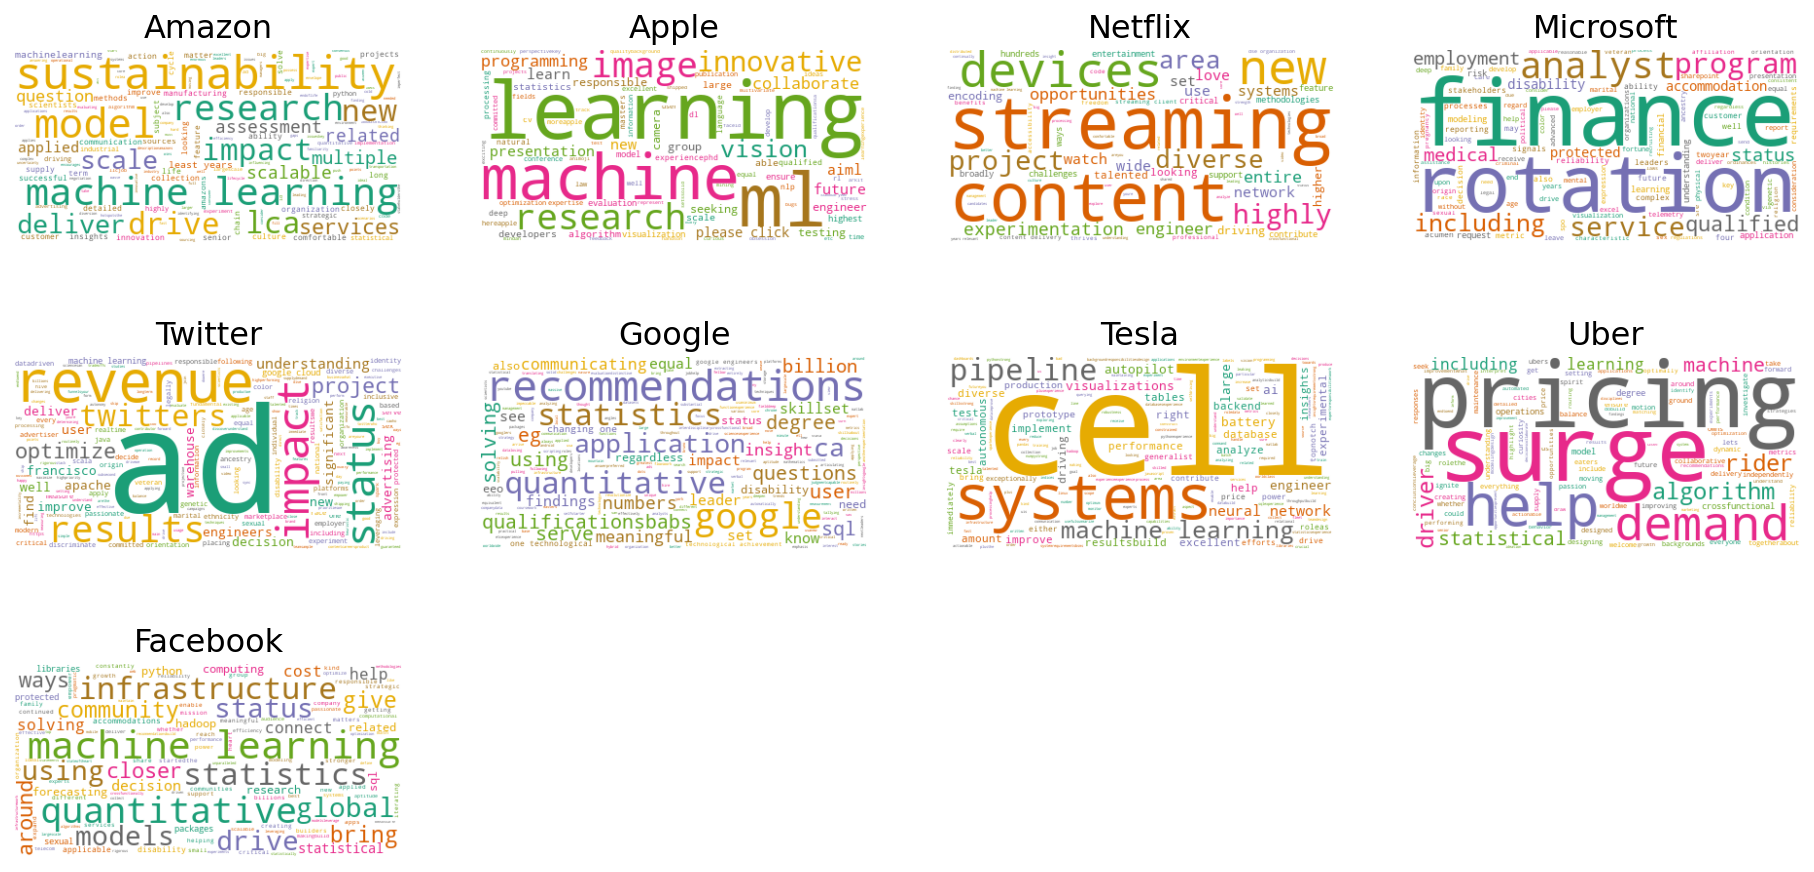

In [35]:
plt.rcParams['figure.figsize'] = [16, 8]
df_cols = data_clean_final.transpose()
comp_names = df_cols.columns
# Create subplots for each comedian
for index, company in enumerate(df_cols.columns):
    wc.generate(data_clean_final.description[company])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(comp_names[index], fontsize=16)
    
plt.show()

### This gives you a brief idea about the job descriptions of each company 
 - Please note that, you can tweak the word-clouds by adding more redundant words to the
   stopwords list and plotting it again

## Creating a document term matrix of the FANG job descriptions 

A document-term matrix is a mathematical matrix that describes the frequency of terms(words) that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms (words).

 - In this case documents are each company's job description and the terms are all the
   words in the description excluding the stopwords 

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean_final.description)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,ab,ability,able,academic,accelerated,accelerating,access,accessibility,accessible,accommodation,...,write,writing,written,years,york,youd,youre,youtube,youtubesitnqxyejugwhat,youve
Amazon,1,2,0,0,0,0,0,0,0,0,...,1,0,1,4,0,0,0,0,0,0
Apple,0,0,2,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
Netflix,2,0,0,0,0,0,2,4,0,0,...,1,0,0,3,0,0,3,0,0,0
Microsoft,0,3,0,0,1,1,0,0,0,4,...,0,0,1,2,0,0,0,0,0,0
Twitter,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,1
Google,0,2,0,0,0,0,0,0,0,2,...,0,0,2,2,2,0,0,2,0,0
Tesla,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Uber,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Facebook,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [37]:
data_dtm = data_dtm.transpose()

In [38]:
top_dict = {}
for c in data_dtm.columns:
    top = data_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))



## The purpose of creating a document term matrix in this case, was to find the top words in the job description of each FANG Company. 
 - There are various other applications of document term matrix. One of them is to find TF-
   IDF. I did not find tf idf to be very useful for this particular case. 

In [39]:
print('The top words in each job description are as mentioned below: \n')
for company, top_words in top_dict.items():
    print(company)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

The top words in each job description are as mentioned below: 

Amazon
sustainability, learning, machine, research, models, years, drive, new, services, scalable, related, applied, deliver, machinelearning
---
Apple
learning, ml, machine, innovative, research, image, learn, presentation, vision, aiml, collaborate, please, programming, new
---
Netflix
streaming, content, highly, dse, new, devices, projects, entire, organization, diverse, delivery, experimentation, opportunities, watch
---
Microsoft
finance, program, rotations, analysts, including, service, rotation, medical, modeling, request, employment, financial, learning, status
---
Twitter
ads, revenue, impact, status, results, understanding, twitters, well, engineers, cloud, new, apache, advertising, warehouse
---
Google
recommendations, google, one, statistics, quantitative, technological, degree, solving, googles, ca, engineers, qualificationsbabs, questions, sql
---
Tesla
systems, learning, neural, machine, large, pipelines, ba

####          I encourage everyone to tweak this repository to find insights in the jobs they are applying for. I hope this was helpful.
# --------------------------------- Thank you!! ----------------------------------------